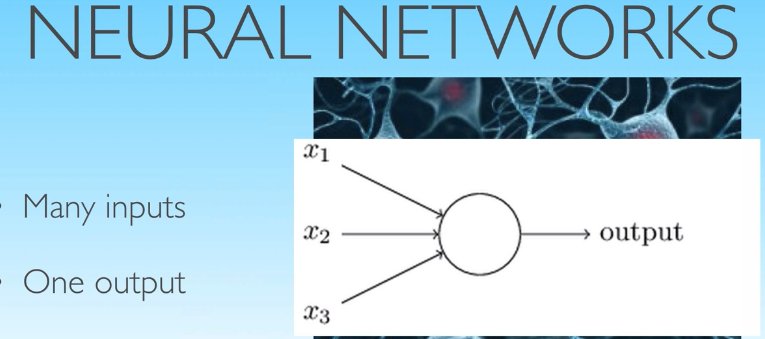

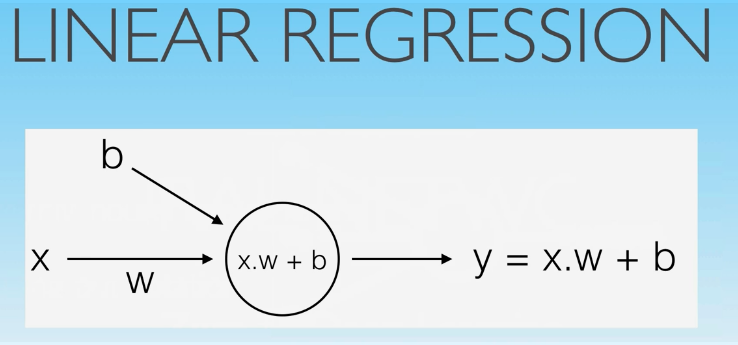

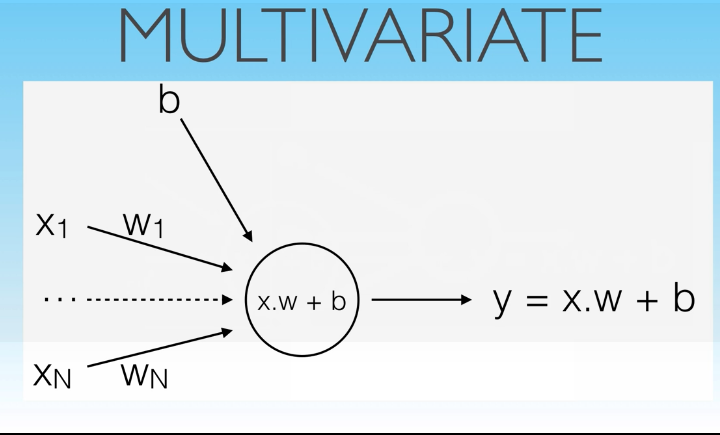

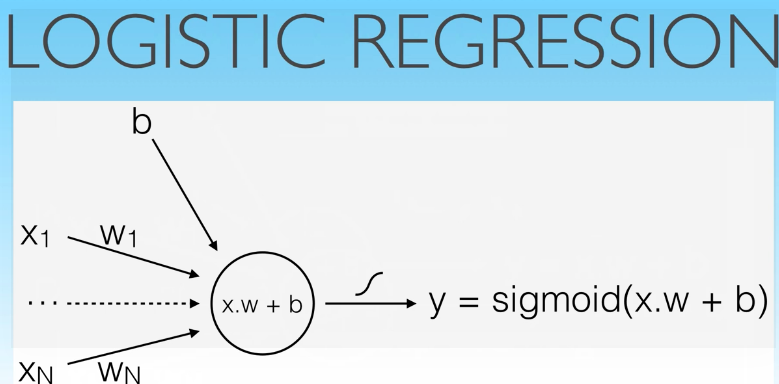

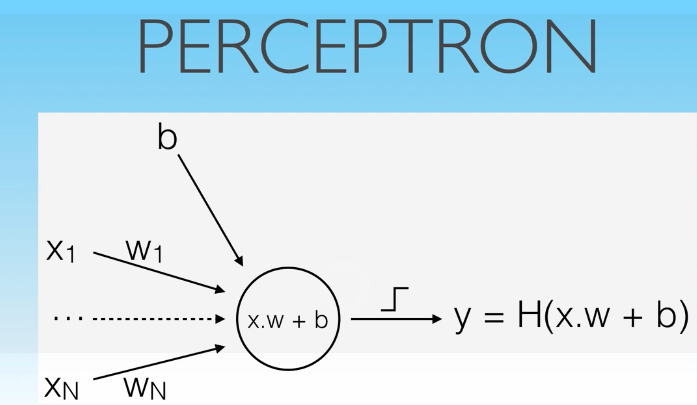

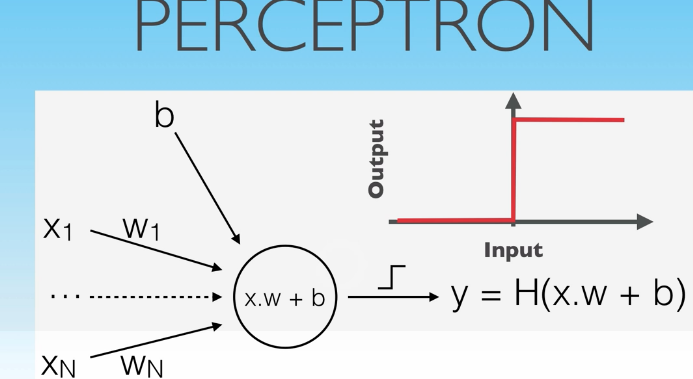

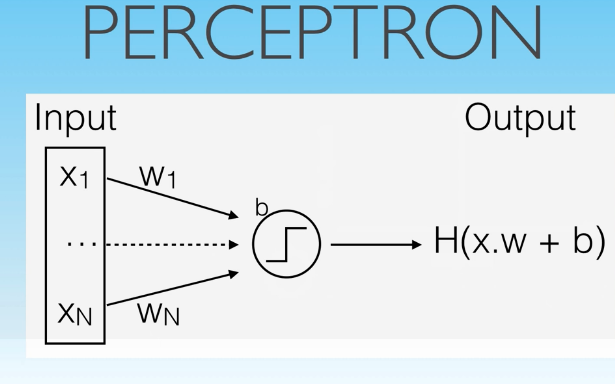

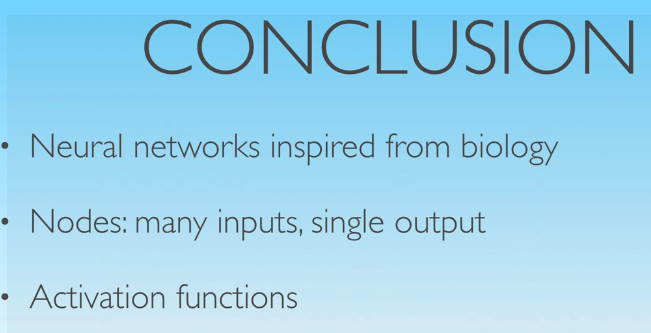

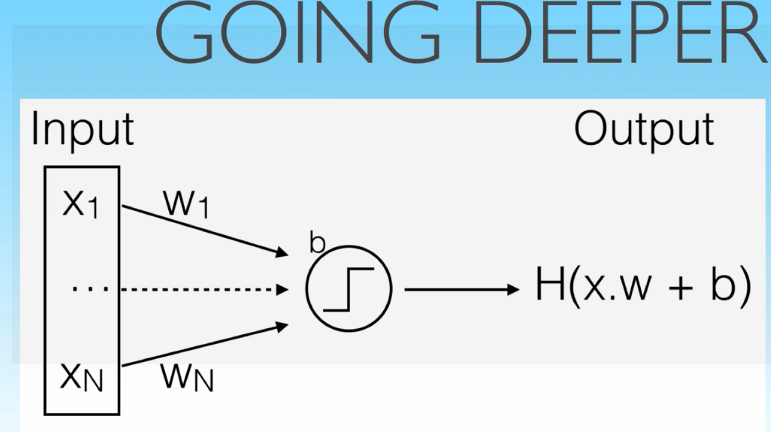

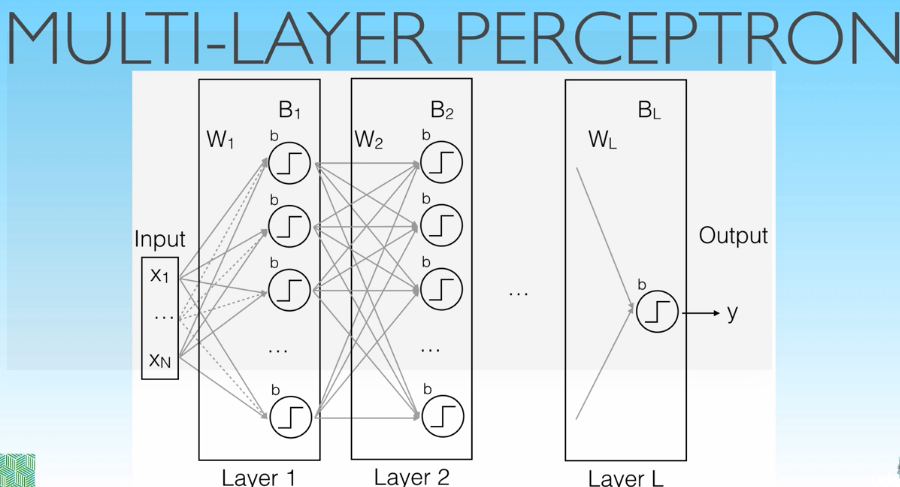

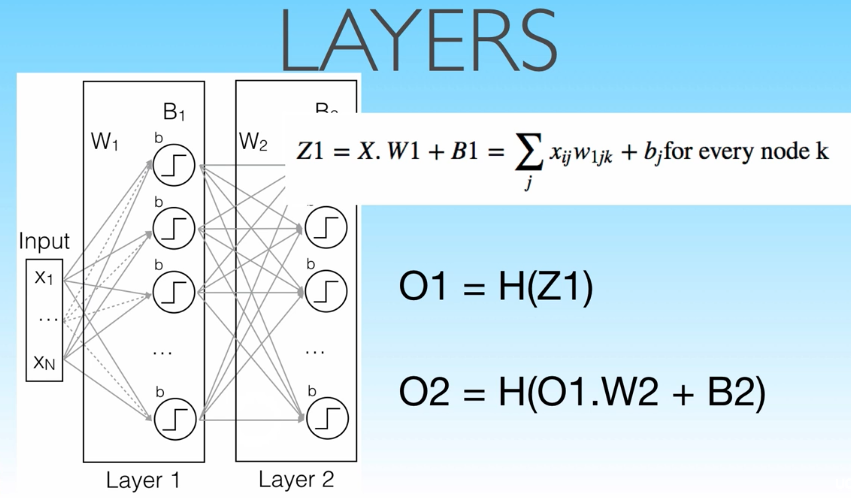

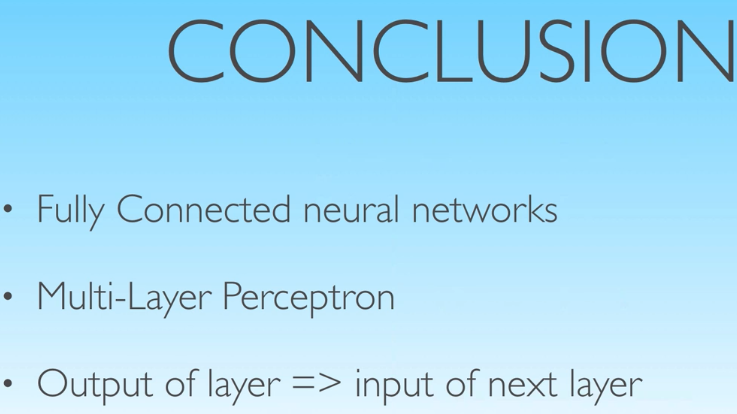

# Deep Learning Intro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Shallow and Deep Networks

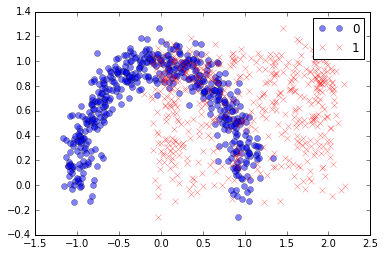

In [6]:
from sklearn.datasets import make_moons
# helper function from sklearn dataset
X,y = make_moons(n_samples=1000,noise = 0.1,random_state=0)
plt.plot(X[y==0,0],X[y==0,1],'ob',alpha =0.5)
plt.plot(X[y==1,0],X[y==0,1],'xr',alpha =0.5)
plt.legend(['0','1'])

In [4]:
X.shape

(1000, 2)

In [5]:
from sklearn.model_selection import train_test_split


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = 0.3,
                                                random_state = 42)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGDGD,Adam

# Shallow Model


In [10]:
model = Sequential()
model.add(Dense(1,input_shape=(2,),activation='sigmoid'))
model.compile(Adam(lr=0.05),'binary_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(X_train,y_train,epochs=200,verbose=0)

In [12]:
results = model.evaluate(X_test,y_test)

300/300 [==============================] - 0s 70us/step


In [15]:
results

[0.3174532196919123, 0.8366666674613953]

In [14]:
print("The accuracy score on train set is:\t{:0.3f}".format(results[1]))

The accuracy score on train set is:	0.837


/home/pratik/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6462: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/pratik/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6462: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


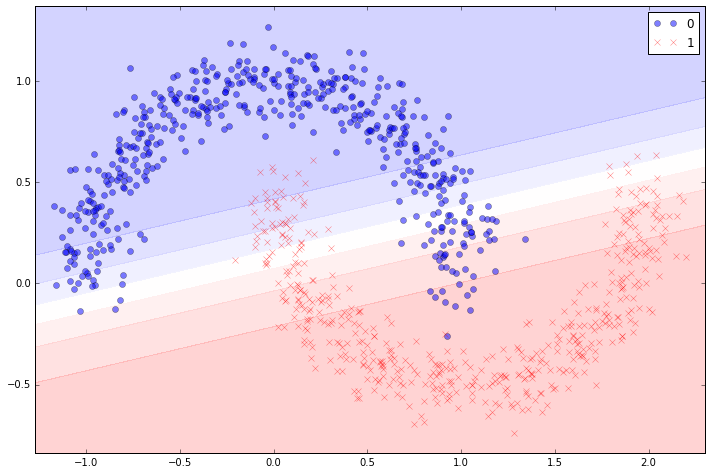

In [16]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)
    